# MNIST with a convolutionnal neural network

In [1]:
import numpy as np
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Preparation for conv2D, resizing (virtual)
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

In [5]:
# Reduction of the data type to float 32 bits 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalisation in [0,1]
X_train = X_train/255.
X_test = X_test/255.

In [6]:
# The labels must be translated into One hot encoding with 10 classes
y_train_c = np_utils.to_categorical(y_train, 10)
y_test_c = np_utils.to_categorical(y_test, 10)

# Building a convolutional model

In [7]:
model = Sequential()

model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1),
                 data_format="channels_last" #Color in the last position
                 ))
# It's a tensor 3x3x32

In [8]:
model.output.shape

TensorShape([None, 26, 26, 32])

At first we had a 28x28, but without padding we lose the edges.

In [9]:
# Second layer
model.add(Conv2D(32, (3,3), activation="relu"))
model.output.shape

TensorShape([None, 24, 24, 32])

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.output.shape

TensorShape([None, 12, 12, 32])

In [11]:
# We add a simple network for classification 
model.add(Flatten())
model.output.shape

TensorShape([None, 4608])

In [12]:
# Dense classification layer
model.add(Dense(128, activation="relu"))
model.output.shape

TensorShape([None, 128])

In [13]:
# Output layer
model.add(Dense(10, activation="softmax"))
model.output.shape

TensorShape([None, 10])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
__________________________________________________

Conv2D first layer : 32 filters of size 3x3 + 1 biais = 10 parameters each, so 320 in total

Conv2d second layer : 3x3 that connect to 32 images from precedent layer + 1 biais  
So, 3x3 x 32 + 1 = 289 parameters for each filter  
So 9248 in total  

In [18]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")

In [19]:
model.fit(X_train, y_train_c,
          batch_size=128,
          validation_split=0.2, #
          epochs=3,
          verbose=1)

Epoch 1/3
375/375 [==============================] - 50s 130ms/step - loss: 0.2082 - accuracy: 0.9370 - val_loss: 0.0710 - val_accuracy: 0.9802
Epoch 2/3
375/375 [==============================] - 50s 134ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0494 - val_accuracy: 0.9850
Epoch 3/3
375/375 [==============================] - 54s 144ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0445 - val_accuracy: 0.9868


## Monitoring / Callbacks

In [22]:
from keras.callbacks import Callback

In [24]:
# a class (function) that will be called at the end of each epoch
class Monitor(Callback):
    
    def on_epoch_end(self, epoch, logs):
        print(f"End of the epoch {epoch}")
        print(f"My infos {logs}")
        print("------------------")

In [26]:
evolution = model.fit(X_train, y_train_c,
                      batch_size=1000,
                      validation_split=0.2,
                      epochs=5,
                      verbose=2,
                      callbacks=[Monitor()])

Epoch 1/5
48/48 - 44s - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.0406 - val_accuracy: 0.9889
End of the epoch 0
My infos {'loss': 0.01633494161069393, 'accuracy': 0.9954583048820496, 'val_loss': 0.04059656709432602, 'val_accuracy': 0.9889166951179504}
------------------
Epoch 2/5
48/48 - 48s - loss: 0.0113 - accuracy: 0.9970 - val_loss: 0.0395 - val_accuracy: 0.9888
End of the epoch 1
My infos {'loss': 0.011299438774585724, 'accuracy': 0.9970208406448364, 'val_loss': 0.0394766628742218, 'val_accuracy': 0.9888333082199097}
------------------
Epoch 3/5
48/48 - 42s - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.0404 - val_accuracy: 0.9891
End of the epoch 2
My infos {'loss': 0.009255414828658104, 'accuracy': 0.9976666569709778, 'val_loss': 0.0403599813580513, 'val_accuracy': 0.9890833497047424}
------------------
Epoch 4/5
48/48 - 45s - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0400 - val_accuracy: 0.9893
End of the epoch 3
My infos {'loss': 0.007825302891433239, 'accuracy': 0.9

In [27]:
import matplotlib.pyplot as plt

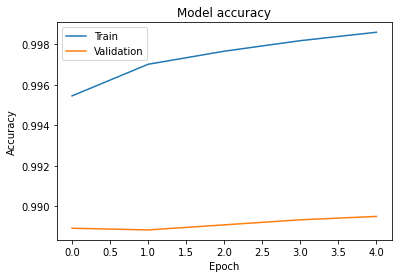

In [33]:
plt.plot(evolution.history["accuracy"], label="Train")
plt.plot(evolution.history["val_accuracy"], label="Validation")
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

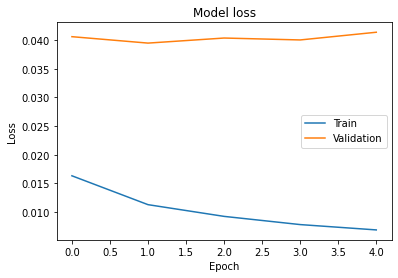

In [34]:
plt.plot(evolution.history["loss"], label="Train")
plt.plot(evolution.history["val_loss"], label="Validation")
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Early stopping 

In [35]:
from keras.callbacks import EarlyStopping

In [36]:
evolution = model.fit(X_train, y_train_c,
                      batch_size=1000,
                      validation_split=0.2,
                      epochs=5,
                      verbose=1,
                      callbacks=[Monitor(),
                                 EarlyStopping(monitor="val_loss", patience=2)])

Epoch 1/5
48/48 [==============================] - 39s 823ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0414 - val_accuracy: 0.9893
End of the epoch 0
My infos {'loss': 0.005829564295709133, 'accuracy': 0.9988958239555359, 'val_loss': 0.04144714027643204, 'val_accuracy': 0.9892500042915344}
------------------
Epoch 2/5
48/48 [==============================] - 43s 896ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.0418 - val_accuracy: 0.9887
End of the epoch 1
My infos {'loss': 0.005111748818308115, 'accuracy': 0.9990416765213013, 'val_loss': 0.041813045740127563, 'val_accuracy': 0.9887499809265137}
------------------
Epoch 3/5
48/48 [==============================] - 42s 879ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0425 - val_accuracy: 0.9891
End of the epoch 2
My infos {'loss': 0.004481262061744928, 'accuracy': 0.9992499947547913, 'val_loss': 0.04249296337366104, 'val_accuracy': 0.9890833497047424}
------------------


In [39]:
save_dir = "models/"
full_filename = save_dir + "best_model.h5"
bestmodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=full_filename,
                                                        verbose=1,
                                                        monitor="accuracy",
                                                        save_best_only=True)

In [40]:
model_name = "models/model.{epoch:04d}.h5"
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_name,
                                                        verbose=0)

In [42]:
evolution = model.fit(X_train, y_train_c,
                      batch_size=1000,
                      validation_split=0.2,
                      epochs=5,
                      verbose=1,
                      callbacks=[Monitor(),
                                 EarlyStopping(monitor="val_loss", patience=2),
                                 bestmodel_callback,
                                 savemodel_callback])

Epoch 1/5
48/48 [==============================] - 39s 816ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0441 - val_accuracy: 0.9885
End of the epoch 0
My infos {'loss': 0.003937074448913336, 'accuracy': 0.9993333220481873, 'val_loss': 0.04406270012259483, 'val_accuracy': 0.9884999990463257}
------------------

Epoch 00001: accuracy improved from -inf to 0.99933, saving model to models\best_model.h5
Epoch 2/5
48/48 [==============================] - 46s 956ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0447 - val_accuracy: 0.9894
End of the epoch 1
My infos {'loss': 0.0033736086916178465, 'accuracy': 0.9994583129882812, 'val_loss': 0.04465761408209801, 'val_accuracy': 0.9894166588783264}
------------------

Epoch 00002: accuracy improved from 0.99933 to 0.99946, saving model to models\best_model.h5
Epoch 3/5
48/48 [==============================] - 47s 981ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0450 - val_accuracy: 0.9890
End of the epoch 2
My infos {'